# Assignment 3 - Superstore Transactions
## Nourhan El Zarif

## Read Dataset

The transaction data set will be imported into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np

In [2]:
file = 'https://library.startlearninglabs.uw.edu/DATASCI420/2019/Datasets/SuperstoreTransaction.csv'

In [3]:
transaction = pd.read_csv(file)

## Customer RFM

To perform RFM, we will cast the Order Date attribute as a date time object.

In [4]:
import datetime
transaction['Order Date'] = pd.to_datetime(transaction['Order Date'], format = '%m/%d/%Y')

In [5]:
transaction.head()

Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [6]:
print('Minimal Date = %s, Maximal Date = %s'%(min(transaction['Order Date']).strftime('%Y-%m-%d'), max(transaction['Order Date']).strftime('%Y-%m-%d')))

Minimal Date = 2014-01-03, Maximal Date = 2017-12-30


We can see that this dataset spans the duration of about 3 years. We will perform RFM on customers who have been active within the last ninety days. The frequency will be interactions per month. 

In [7]:
import datetime as dt
Start_Date_Obj = dt.datetime.strptime('2017-01-01','%Y-%m-%d')
End_Date_Obj = dt.datetime.strptime('2017-12-30', '%Y-%m-%d')
Time_Window = 90 #days
FM_Window = 30 #days for frequency and monetary


check_point_date = Start_Date_Obj



The RFM will be performed every 90 days for checkpoints starting on 1-1-2017. 

In [8]:
from collections import OrderedDict

while check_point_date <= End_Date_Obj:
    CustID = []
    Checkpoint = []
    Recency = []
    Frequency = []
    Monetary_Value = []
    Monetary_Quantity = []
    
    window_start = check_point_date - dt.timedelta(days = Time_Window)
    mask = (transaction['Order Date'] >= window_start) & (transaction['Order Date'] < check_point_date)
    tran_checkpoint = transaction.loc[mask]
    
    unique_users = list(set(tran_checkpoint['Customer ID']))
    print('There are %d unique users'%(len(unique_users)))
    FM_Window_Start = check_point_date - dt.timedelta(days = FM_Window)
    
    for user in unique_users:
        CustID.append(user)
        Checkpoint.append(check_point_date)
        
        mask = tran_checkpoint['Customer ID'] == user
        tran_checkpoint_user = tran_checkpoint.loc[mask]
        delta = check_point_date - max(tran_checkpoint_user['Order Date'])
        recency = delta.days
        Recency.append(recency)
        
        mask = tran_checkpoint_user['Order Date']>= FM_Window_Start
        tran_checkpoint_user_fm = tran_checkpoint_user[mask]
        frequency = tran_checkpoint_user_fm.shape[0]
        Frequency.append(frequency)
        
        value = np.sum(tran_checkpoint_user_fm.loc[:, 'Sales'])
        Monetary_Value.append(value)
        
        quantity = np.sum(tran_checkpoint_user_fm.loc[:, 'Quantity'])
        Monetary_Quantity.append(quantity)
        
    RFM_Dict = OrderedDict([('CustID', CustID),
                            ('Checkpoint', Checkpoint),
                            ('Recency', Recency),
                            ('Frequency', Frequency),
                            ('Value', Monetary_Value),
                            ('Quantity', Monetary_Quantity)])
        
    RFM_Frame = pd.DataFrame.from_dict(RFM_Dict)
    print(RFM_Frame.head())
    print()
    print()
        
    check_point_date = check_point_date + dt.timedelta(days = 90)
    

There are 340 unique users
     CustID Checkpoint  Recency  Frequency   Value  Quantity
0  CM-12445 2017-01-01       73          0    0.00         0
1  BG-11035 2017-01-01       45          0    0.00         0
2  FO-14305 2017-01-01        3          2   41.99         3
3  LT-17110 2017-01-01       43          0    0.00         0
4  DN-13690 2017-01-01       10          2  884.68        10


There are 218 unique users
     CustID Checkpoint  Recency  Frequency     Value  Quantity
0  MC-17575 2017-04-01       57          0     0.000         0
1  SP-20920 2017-04-01       16          5   315.041        15
2  EJ-13720 2017-04-01       29          2  1219.792        11
3  BE-11410 2017-04-01       70          0     0.000         0
4  ML-17395 2017-04-01       51          0     0.000         0


There are 283 unique users
     CustID Checkpoint  Recency  Frequency    Value  Quantity
0  LS-17200 2017-06-30       13          3   23.888        10
1  HZ-14950 2017-06-30       32          0    0

We can see that Fall and Winter have higher active user counts than earlier that year. The most recent RFM frame will be used for customer segmentation.

In [9]:
RFM_Frame.head()

CustID Checkpoint  Recency  Frequency    Value  Quantity
0  BG-11035 2017-12-27       25          1   32.776         1
1  FO-14305 2017-12-27       35          0    0.000         0
2  ZC-21910 2017-12-27       51          0    0.000         0
3  LT-17110 2017-12-27       31          0    0.000         0
4  DB-12910 2017-12-27       18          2  193.917         8

## Customer Segmentation with K-Means

Customers that have been active within the last 90 days will be segmented into 3 groups by frequency and spending using K-Means. To do so, both attriutes will be normalized. 

In [10]:
dataset = pd.DataFrame()
dataset.loc[:, 0] = RFM_Frame.loc[:,'Frequency']
dataset.loc[:, 1] = RFM_Frame.loc[:, 'Value']

def normalizeColumn(col):
    #this function was made to be generic and accept any column
    #this function will z-normalize the input column
    normCol = (col - np.mean(col))/np.std(col)
    #this returns a list of the z-normalized input
    return normCol

dataset.loc[:,0] = normalizeColumn(dataset.loc[:,0])
dataset.loc[:,1] = normalizeColumn(dataset.loc[:,1])

Initial guesses will be made. 

In [11]:
guess = pd.DataFrame()
guess.loc[:,0] = [0, 1, 2]
guess.loc[:,1] = [0, 1, 4]

In [12]:
from sklearn.cluster import KMeans
FM = KMeans(n_clusters=3, init=guess, n_init=1).fit(dataset)
labels = FM.labels_
centers = pd.DataFrame(FM.cluster_centers_)

In [13]:
import matplotlib.pyplot as plt
def Plot2DKMeans(Points, Labels, ClusterCentroids, Title):
    plt.figure(figsize=(8,6))
    for LabelNumber in range(max(Labels)+1):
        LabelFlag = Labels == LabelNumber
        color =  ['c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y'][LabelNumber]
        marker = ['s', 'o', 'v', '^', '<', '>', '8', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'][LabelNumber]
        plt.scatter(Points.loc[LabelFlag,0], Points.loc[LabelFlag,1],
                    s= 100, c=color, edgecolors="black", alpha=0.3, marker=marker)
        plt.scatter(ClusterCentroids.loc[LabelNumber,0], ClusterCentroids.loc[LabelNumber,1], s=200, c="black", marker=marker)
    plt.title(Title)
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Normalized Monetary Value')
    plt.show()

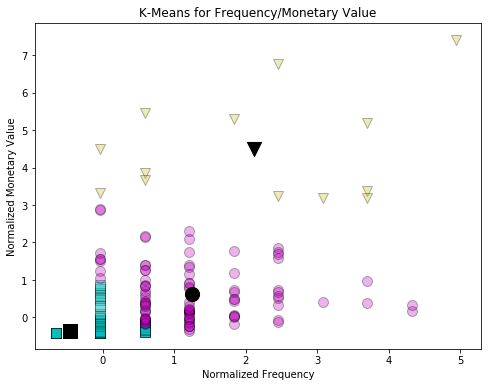

In [14]:
Plot2DKMeans(dataset, labels, centers, "K-Means for Frequency/Monetary Value")

## Results

The plot for Frequency vs Monetary Value shows a clear trend between interaction with the system, and a customer's spending habits. As a customer's frequency of interaction increases, the moneary value increases in an exponential trend. As a result, the three customer segments are as follows:
    1. Customers that interact less frequently that average, spend less than average.
    2. Customers that interact 1 std more frequently than average, spend 1 std more than average.
    3. Customers that interact 2 std more frequently than average, spend 4 std more than average. 